In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [13]:
data = yf.download('USDTRY=X', start='2013-01-01', end='2023-01-01',  interval = '1d')

[*********************100%***********************]  1 of 1 completed


Iteration:      1,   Func. Count:      5,   Neg. LLF: 85088.26974027636
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1206401.3526719967
Iteration:      3,   Func. Count:     18,   Neg. LLF: 12319933.797863299
Iteration:      4,   Func. Count:     23,   Neg. LLF: 3349.314646487356
Iteration:      5,   Func. Count:     28,   Neg. LLF: 3293.828980722139
Iteration:      6,   Func. Count:     32,   Neg. LLF: 3292.744075297912
Iteration:      7,   Func. Count:     36,   Neg. LLF: 3292.7307815517715
Iteration:      8,   Func. Count:     40,   Neg. LLF: 3292.7304091632504
Iteration:      9,   Func. Count:     44,   Neg. LLF: 3292.7302336643443
Iteration:     10,   Func. Count:     48,   Neg. LLF: 3292.7302131084043
Iteration:     11,   Func. Count:     52,   Neg. LLF: 3292.7302123462514
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3292.7302123462514
            Iterations: 11
            Function evaluations: 52
            Gradient evaluat

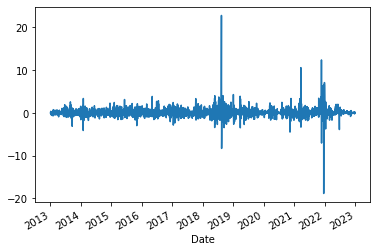

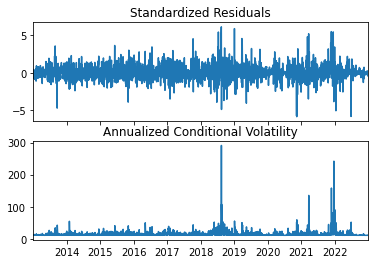

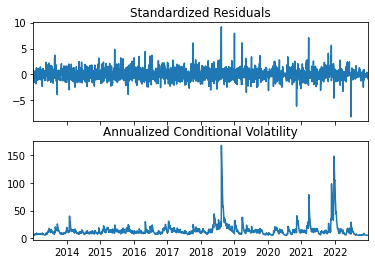

In [14]:
import matplotlib.pyplot as plt
import datetime as dt  # optional


market = data["Adj Close"]

returns = 100 * market.pct_change().dropna() # generating return series
ax = returns.plot() # ploting the data

#xlim = ax.set_xlim(returns.index.min(), returns.index.max())

# Estimating a GARCH and ARCH models
from arch import arch_model

model1 = arch_model(returns, p=1,o=0,q=0)
out1=model1.fit()
print(out1.summary())

model2 = arch_model(returns, p=1,o=0,q=1)
out2=model2.fit()
print(out2.summary())

fig1 = out1.plot(annualize="D") #generating volatility graphs

fig2 = out2.plot(annualize="D") #generating volatility graphs




Iteration:      1,   Func. Count:      7,   Neg. LLF: 19725.26491947956
Iteration:      2,   Func. Count:     19,   Neg. LLF: 9123.574888687584
Iteration:      3,   Func. Count:     29,   Neg. LLF: 9912.754557416492
Iteration:      4,   Func. Count:     36,   Neg. LLF: 3188.8118625211036
Iteration:      5,   Func. Count:     43,   Neg. LLF: 3249.571513821777
Iteration:      6,   Func. Count:     51,   Neg. LLF: 3237.7123383318017
Iteration:      7,   Func. Count:     58,   Neg. LLF: 25901.10719290517
Iteration:      8,   Func. Count:     68,   Neg. LLF: 3254117521.480217
Iteration:      9,   Func. Count:     76,   Neg. LLF: 5431.007133748998
Iteration:     10,   Func. Count:     85,   Neg. LLF: 3689.1990751790554
Iteration:     11,   Func. Count:     92,   Neg. LLF: 3292.1986700053703
Iteration:     12,   Func. Count:     99,   Neg. LLF: 3135.0658721240225
Iteration:     13,   Func. Count:    106,   Neg. LLF: 3169.1277343299184
Iteration:     14,   Func. Count:    113,   Neg. LLF: 3106

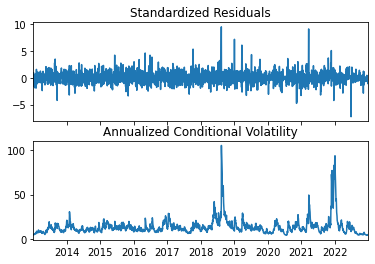

In [15]:
# Estimating TGARCH

model3= arch_model(returns, p=1, o=1, q=1, power=1.0)
out3= model3.fit()
print(out3.summary())
fig3 = out3.plot(annualize="D") #generating volatility graphs

In [16]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2605.000000,2605.000000,2605.000000,2605.000000,2605.000000,2605.0
mean,5.644021,5.683753,5.614350,5.644339,5.644339,0.0
std,4.306473,4.336184,4.286369,4.306601,4.306601,0.0
min,1.747420,1.758700,1.745900,1.748370,1.748370,0.0
25%,2.705080,2.721420,2.686900,2.705080,2.705080,0.0
50%,3.810600,3.831620,3.796900,3.810600,3.810600,0.0
75%,6.926520,6.972300,6.888130,6.926100,6.926100,0.0
max,18.702990,18.793501,18.693010,18.702990,18.702990,0.0


In [17]:
import yfinance as yf

# Get the stock info
stock = yf.Ticker("TRYUSD=X")

# Get the historical market data
hist = stock.history(period="max")

# Print the close price
print(hist["Close"][-1])

0.053174518048763275


Text(0.5, 1.0, 'Price')

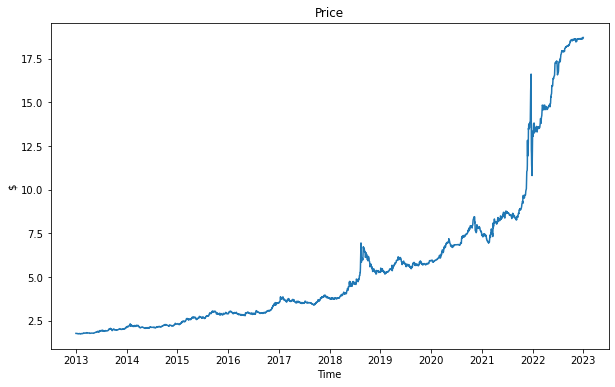

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Stock 1')
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Price')

In [19]:
data['Log returns']=np.log(data['Close']/data['Close'].shift())

Text(0.5, 1.0, 'Volatility')

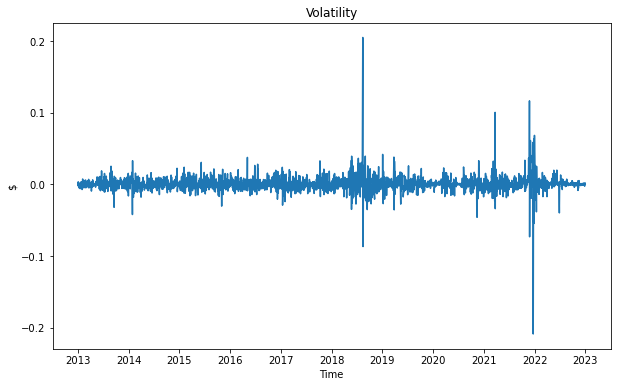

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(data['Log returns'], label='Volatility')
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Volatility')